Responsabilidades:
- Implementar en Python/MATLAB el modelo simbólico de la función de transferencia en lazo abierto L(s).
- Verificar que el numerador y denominador cumplan con lo especificado.
- Graficar el Lugar Geométrico de las Raíces con valores iniciales de Ti = τ y Td = τ/10.
- Identificar el recorrido de los polos al variar Kp.

Entregables:
- Código con control.matlab o control de Python.
- Gráfica del LGR.
- Captura/análisis de comportamiento de los polos.
trial

In [2]:
! pip install control matplotlib numpy ipywidgets 

   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.2 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.2 MB ? eta -:--:--
   ---- --------------------------


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
pip install sympy

   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   - -------------------------------------- 0.3/6.3 MB ? eta -:--:--
   - -------------------------------------- 0.3/6.3 MB ? eta -:--:--
   - -------------------------------------- 0.3/6.3 MB ? eta -:--:--
   --- ------------------------------------ 0.5/6.3 MB 439.1 kB/s eta 0:00:14
   ---- ----------------------------------- 0.8/6.3 MB 555.0 kB/s eta 0:00:10
   ---- ----------------------------------- 0.8/6.3 MB 555.0 kB/s eta 0:00:10
   ------ --------------------------------- 1.0/6.3 MB 576.2 kB/s eta 0:00:10
   ------ --------------------------------- 1.0/6.3 MB 576.2 kB/s eta 0:00:10
   -------- ------------------------------- 1.3/6.3 MB 606.3 kB/s eta 0:00:09
   -------- ------------------------------- 1.3/6


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## 1. Función de transferencia en lazo abierto

In [ ]:
from sympy import symbols, simplify

s, Kp, K, Ti, Td, tau = symbols('s K_p K T_i T_d tau')  

G_PID = Kp * (1 + 1/(Ti * s) + Td * s)  
G_PID = simplify(G_PID)  # Combina términos

# Función de la planta
G_planta = K / (tau * s + 1)

# Función en lazo abierto
L = G_PID * G_planta
L = simplify(L)
print("L(s) =", L)
#Listo todo

L(s) = K*K_p*(T_i*s*(T_d*s + 1) + 1)/(T_i*s*(s*tau + 1))


## 2. Trazado del Lugar Geométrico de las Raíces

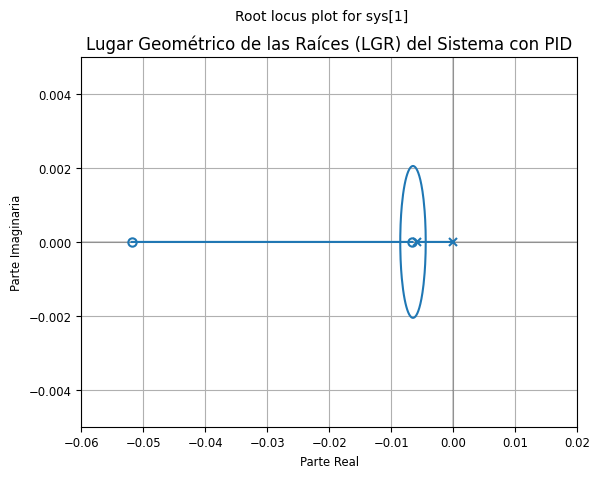

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl
from ipywidgets import interact, FloatSlider

# Parámetros de la planta (ejemplo - usar valores reales de su sistema)
def simulacion(K=0):
            # Ganancia de la planta
    tau = 171   # Constante de tiempo de la planta (segundos)

    # Parámetros provisionales del PID
    Ti = tau      # Tiempo integral = constante de tiempo de la planta
    Td = tau/10   # Tiempo derivativo = 10% de la constante de tiempo

    # Definir la función de transferencia en lazo abierto
    num = [K*Ti*Td, K*Ti, K]
    den = [Ti*tau, Ti, 0]
    L = ctrl.TransferFunction(num, den)

    # Graficar el LGR

    ctrl.root_locus(L, grid=False)
    plt.title('Lugar Geométrico de las Raíces (LGR) del Sistema con PID')
    plt.xlabel('Parte Real')
    plt.ylabel('Parte Imaginaria')
    plt.gca().set_aspect('auto')
    plt.xlim(-0.06, 0.02)
    plt.ylim(-0.005, 0.005)
    plt.grid(True)
    plt.show()
simulacion(0.3593)  # Llamada inicial para mostrar el gráfico
